In [4]:
import pandas as pd
from tld import get_tld
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Importing csv

In [5]:
df = pd.read_csv (r'RedditSpider.csv')

In [6]:
df.head()

,from,to,title
0,https://www.reddit.com/r/news/,https://www.cnbc.com/2019/11/18/criminal-charg...,Criminal charges expected this week against Ep...
1,https://www.reddit.com/r/news/,https://www.taiwannews.com.tw/en/news/3819595,Video sparks fears Hong Kong protesters being ...
2,https://www.reddit.com/r/news/,https://www.cnn.com/2019/11/18/middleeast/iran...,Iran has gone almost entirely offline as autho...
3,https://www.reddit.com/r/news/,https://www.cnbc.com/2019/11/18/chick-fil-a-dr...,Chick-fil-A drops donations to Christian chari...
4,https://www.reddit.com/r/news/,https://www.cbsnews.com/video/jeffrey-epstein-...,Jeffrey Epstein accuser describes cameras that...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
from     96 non-null object
to       96 non-null object
title    96 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


# Erweitern um die TLDs

In [8]:
l = []
for e in df['to']:
    l.append(get_tld(e, fail_silently=True))
df['tld'] = l

In [9]:
df.head()

,from,to,title,tld
0,https://www.reddit.com/r/news/,https://www.cnbc.com/2019/11/18/criminal-charg...,Criminal charges expected this week against Ep...,com
1,https://www.reddit.com/r/news/,https://www.taiwannews.com.tw/en/news/3819595,Video sparks fears Hong Kong protesters being ...,com.tw
2,https://www.reddit.com/r/news/,https://www.cnn.com/2019/11/18/middleeast/iran...,Iran has gone almost entirely offline as autho...,com
3,https://www.reddit.com/r/news/,https://www.cnbc.com/2019/11/18/chick-fil-a-dr...,Chick-fil-A drops donations to Christian chari...,com
4,https://www.reddit.com/r/news/,https://www.cbsnews.com/video/jeffrey-epstein-...,Jeffrey Epstein accuser describes cameras that...,com


***
# Einfach Auswertung zu den TLDs

Aufsummierung der tlds aus dem Feld 'url'

In [10]:
df['tld'].value_counts()

com       87
org        4
net.au     1
ca         1
co.uk      1
net        1
com.tw     1
Name: tld, dtype: int64

Erzeugen einer grafischen Darstellung

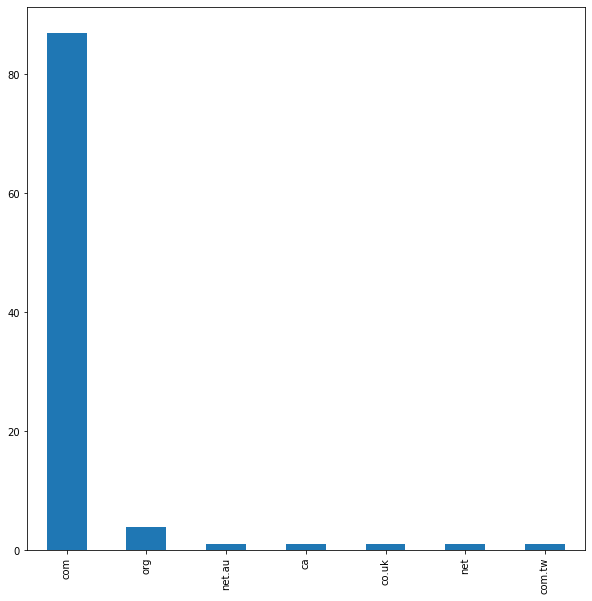

In [11]:
df['tld'].value_counts().plot(kind='bar', figsize=(10,10))

Aufsummierung der tlds aus dem Feld 'url' und Berechnung des Anteils am Gesamten. Anschließend grafische Darstellung als Pie Chart.

In [12]:
df['tld'].value_counts(normalize=True)

com       0.906250
org       0.041667
net.au    0.010417
ca        0.010417
co.uk     0.010417
net       0.010417
com.tw    0.010417
Name: tld, dtype: float64

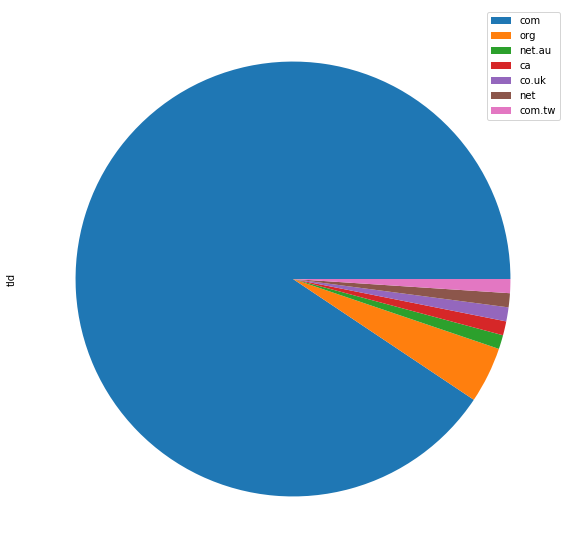

In [13]:
df['tld'].value_counts(normalize=True).plot.pie(legend=True, labels=None, figsize=(10,10))

Was wir hier sehen ist, dass auf /r/news zum Zeitpunkt der Aufnahme Hauptsächlich auf Seiten mit `.com` verlinkt wird. Ein durchaus nennenswerter teil kommt auch aus `com.tw`, was mit den Protesten in Hong Kong zusammenhängen sollte.

***
# Häufig Verlinkte URLs identifizieren

Es macht auf /r/news nicht wirklich Sinn nach unique verlinkenden `from` Seiten zu suchen, da diese der Definition nach /r/news sind. Was man aber schauen kann, ist, welche Newsseiten populär `to`. Damit ließen sich tagesaktuelle Authorities identifizieren. Zusätzlich kann man schauen wie viele Seiten davon per http und per https angesprochen werden.

In [42]:
from urllib.parse import urlsplit
df_urlsplit = df['to'].map(urlsplit)
df_urls = pd.DataFrame(df_urlsplit.tolist(), index=df_urlsplit.index)
df_urls = df_urls[['scheme', 'netloc', 'path']]
df_urls.head()

,scheme,netloc,path
0,https,www.cnbc.com,/2019/11/18/criminal-charges-expected-this-wee...
1,https,www.taiwannews.com.tw,/en/news/3819595
2,https,www.cnn.com,/2019/11/18/middleeast/iran-protests-explained...
3,https,www.cnbc.com,/2019/11/18/chick-fil-a-drops-donations-to-chr...
4,https,www.cbsnews.com,/video/jeffrey-epstein-accuser-describes-camer...


Wir erhalten damit ein Dataframe, das unserem Vorhaben entspricht.

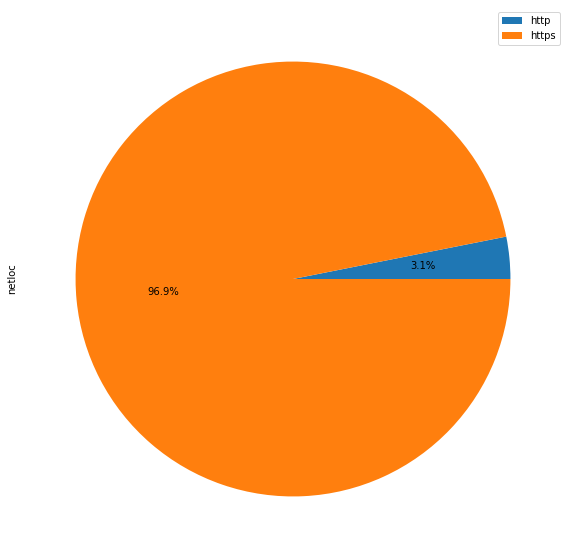

In [49]:
df_scheme = df_urls.groupby('scheme').count()['netloc']
df_scheme.plot.pie(legend=True, labels=None, figsize=(10,10), autopct='%1.1f%%')

Wir sehen, dass fast alle Links verschlüsselt sind und der unverschlüsselte Anteil bei 3% liegt.

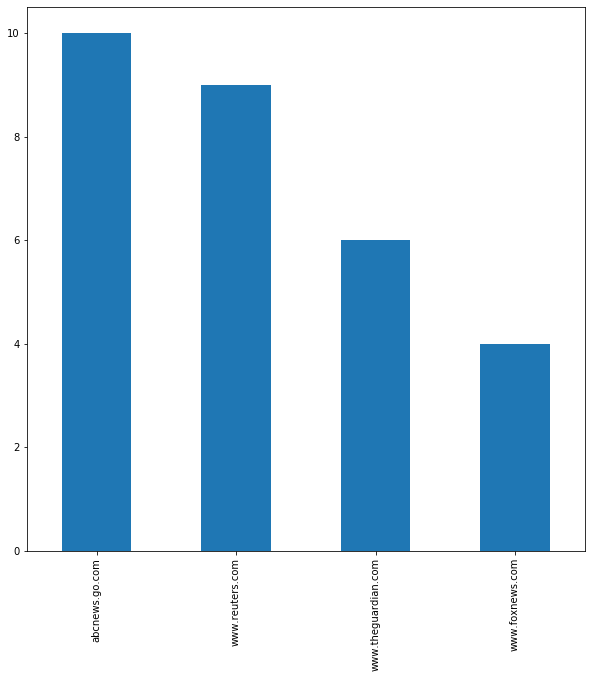

In [96]:
#counts = pd.value_counts(df_urls['netloc'].values)#
df_counts = pd.DataFrame(data=counts, columns = ['count'])
coounts = df_urls['netloc'].value_counts()
df_auths = df_urls[df_urls['netloc'].isin(counts[counts > 3].index)]
df_auths['netloc'].value_counts().plot(kind='bar', figsize=(10,10))

Wir filtern nach Newsseiten, die öfter als 3 mal genannt werden (auf 100 Links) und erhalten, dass abcnews, reuters, theguardian und foxnews die am häufigsten referenzierten Seiten sind.